In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal

(array([  1.,   4.,  28.,  85., 213., 286., 240., 110.,  29.,   4.]),
 array([29.48916257, 33.20807212, 36.92698166, 40.6458912 , 44.36480075,
        48.08371029, 51.80261983, 55.52152937, 59.24043892, 62.95934846,
        66.678258  ]),
 <BarContainer object of 10 artists>)

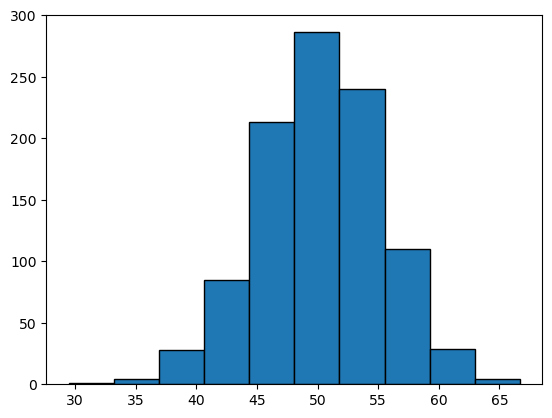

In [12]:
sample=normal(loc=50,scale=5,size=1000)
plt.hist(sample,bins=10,edgecolor='black')

In [13]:
sample_mean=sample.mean()
sample_std=sample.std()

In [18]:
from scipy.stats import norm
nor_dis=norm(sample_mean,sample_std)

In [19]:
values=np.linspace(sample.min(),sample.max(),100)
probabilities=[nor_dis.pdf(value) for value in values]

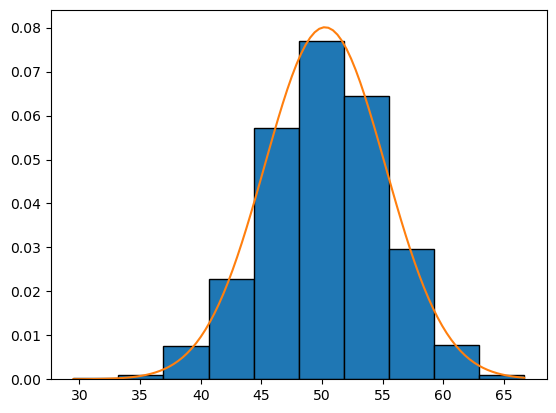

In [24]:
plt.hist(sample,bins=10,edgecolor='black',density=True)
plt.plot(values,probabilities)

# KDE

In [38]:
sample1=normal(loc=20,scale=5,size=700)
sample2=normal(loc=40,scale=5,size=300)
sample=np.hstack((sample1,sample2))

(array([ 14.,  97., 240., 230., 105.,  48.,  90., 106.,  57.,  13.]),
 array([ 5.36496743, 10.16134906, 14.9577307 , 19.75411233, 24.55049396,
        29.34687559, 34.14325723, 38.93963886, 43.73602049, 48.53240213,
        53.32878376]),
 <BarContainer object of 10 artists>)

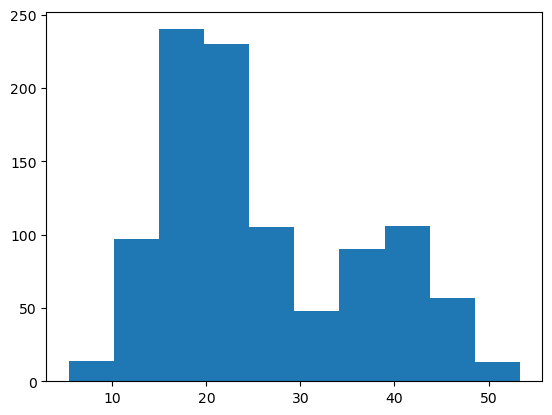

In [39]:
plt.hist(sample,bins=10)

In [41]:
from sklearn.neighbors import KernelDensity
model=KernelDensity(bandwidth=3,kernel='gaussian')
sample=sample.reshape(len(sample),1)
model.fit(sample)

KernelDensity(bandwidth=3)

In [42]:
values=np.linspace(sample.min(),sample.max(),100)
values=values.reshape(len(values),1)

In [44]:
probabilities=model.score_samples(values)
probabilities=np.exp(probabilities)

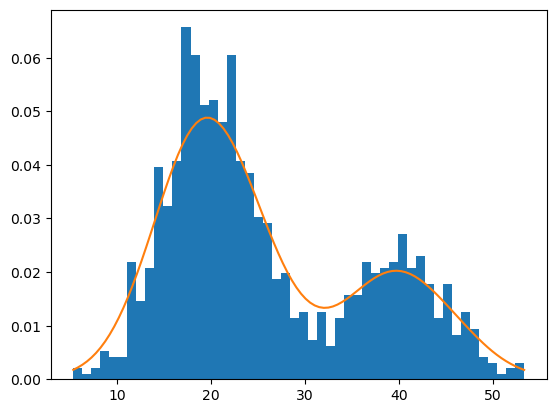

In [46]:
plt.hist(sample,bins=50,density=True)
plt.plot(values,probabilities)